# Работа с отсутствующими данными (пропущенными данными, Missing Data)

Ранее мы уже видели операции в Pandas для отсутствующих данных. Давайте применим их для очистки файла с реальными данными. Пожалуйста помните, что не существует единственного стопроцентного способа сделать такую очистку правильно. В этом блокноте мы приведём всего лишь один из примеров того, как это можно сделать для конкретного файла с данными.

#### Замечание №1: В этом разделе мы будем постепенно очищать набор данных Ames Housing Dataset и добавлять в него новые признаки, чтобы работать с ними в следующем разделе. Пожалуйста следите в этом блокноте за тем, чтобы загружать данные из файла с одним и тем же названием.

#### Замечание №2: Некоторые применённые здесь методы могут не привести к оптимальной производительности модели, они приведены для демонстрации различных доступных методов.
-----

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [ ]:
#Посмотрим описание признаков

In [2]:
# with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f:
#     print(f.read())
dataset_path = kagglehub.dataset_download("sameelie/resume-hh")

100%|██████████| 67.3M/67.3M [00:01<00:00, 37.3MB/s]

Extracting files...


## Данные


In [3]:
# df = pd.read_csv("../DATA/Ames_outliers_removed.csv")
df = pd.read_csv(f'{dataset_path}/hh_ru.csv', sep=';')


In [4]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [6]:
len(df.columns)

12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [6]:
len(df.columns)

12

## Признаки со значениями NaN

In [ ]:
df.isnull()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,False,False,False,False,False,False,False,False,False,False,False,False
44740,False,False,False,False,False,False,False,False,False,False,False,False
44741,False,False,False,False,False,False,False,False,False,False,False,False
44742,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
"Пол, возраст",0
ЗП,0
Ищет работу на должность:,0
"Город, переезд, командировки",0
Занятость,0
График,0
Опыт работы,168
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Образование и ВУЗ,0


In [ ]:
#490 строк с пропусками значений

In [9]:
100* df.isnull().sum() / len(df)

,0
"Пол, возраст",0.000000
ЗП,0.000000
Ищет работу на должность:,0.000000
"Город, переезд, командировки",0.000000
Занятость,0.000000
График,0.000000
Опыт работы,0.375469
Последнее/нынешнее место работы,0.002235
Последняя/нынешняя должность,0.004470
Образование и ВУЗ,0.000000


In [ ]:
#16.74069 % с пропусками занчений

In [ ]:
# Содзадим свою функцию для вычисления % пропущенных данных

In [12]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [15]:
percent_nan

,0
Последнее/нынешнее место работы,0.002235
Последняя/нынешняя должность,0.004470
Опыт работы,0.375469


In [ ]:
# Видим процент отсцтствующих значений

In [14]:
percent_nan = percent_missing(df)

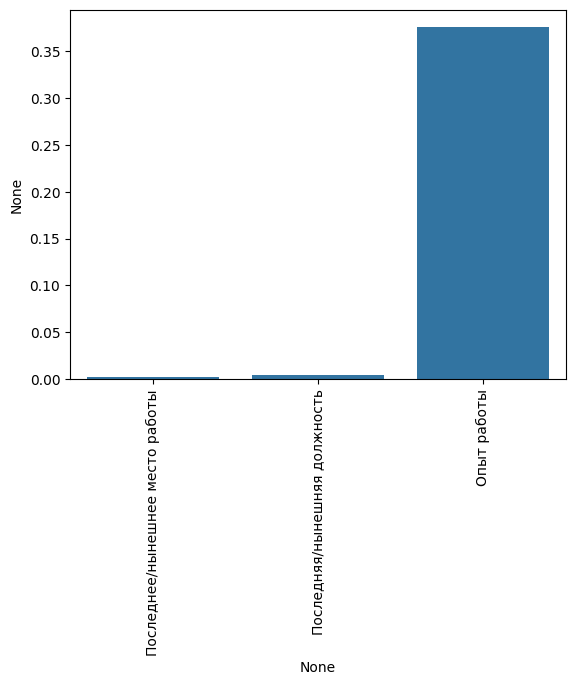

In [16]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
# см презентацию

# Удаление признаков или удаление строк

Если значения отсутствуют только в нескольких строках, количество которых мало по сравнению с общим количеством строк, то можно рассмотреть вариант удалить такие строки. К чему это приведёт с точки зрения точности работы модели? По сути, мы удаляем некоторые данные для обучения и тестирования, но поскольку таких строк очень мало, то скорее всего мы не сильно повлияем на точность модели.

Если же значения отсутствуют почти во всех строках, то имеет смысл полностью удалить такие признаки. Однако перед этим следует внимательно разобраться, почему неопределённых значений так много. В некоторых случаях можно рассмотреть такие данные как отдельную категорию, отдельно от остальных данных.

В качестве примера возьмём признак "количество машин, которые могут поместиться в гараже". Но если гаража вообще нет, то вместо значения 0 может проставляться неопределённое значение null. В таким случае имеет смысл заменить значения null на нули. Только Вы можете решить, что делать с неопределёнными значениями! Используйте Ваши знания о предметной области и специфике данных!

## Работа с отсутствующими данными в строках

## Заменять данные чем-то, или удалять данные?

Давайте поймём, в каких случаях лучше заменять отсутствующие данные какими-то значениями (например, средним значением), а в каких случаях удалять такие строки. Давайте выберем некоторое пороговое значение (threshold) и договоримся, что при его привышении мы решаем удалять строки (вместо того, чтобы заменять отсутствующее значение каким-то другим значением). Мы выберем пороговое значение 1%. Это значит, что если меньше 1% строк содержат неопределённое значение какого-то признака, то мы просто удалим такие строки. Здесь нет правильного ответа на вопрос, какое следует выбрать пороговое значение. Можете использовать знания о специфике предметной области, но в любом случае пороговое значение не должно быть очень большим, например 50%.

Глядя на текстовое описание признаков, мы видим, что в нашем случае значения NaN проставляются намеренно - они означают 0 или "нисколько".

## Пример замены (заполнения) данных

(0.0, 1.0)

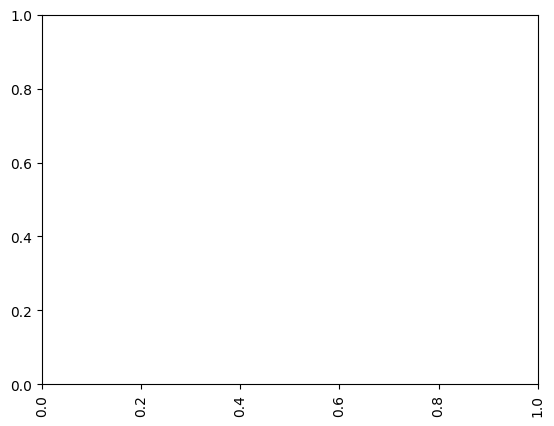

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1%. Такой % строк мы считаем допустимым удалить.
plt.ylim(0,1)

Далее на основе этих данных мы или удалим строки, или заменим отсутствующие данные некоторыми значениями. Посмотрите видео-лекцию для более подробного рассказа по этой теме.

In [18]:
# Сравниваем с пороговым значением
percent_nan[percent_nan < 1]

,0
Последнее/нынешнее место работы,0.002235
Последняя/нынешняя должность,0.004470
Опыт работы,0.375469


In [19]:
100/len(df)

0.0022349365278026105

In [ ]:
# 0.0341646737273659 - это доля одной строки в DF

In [58]:
df[df['Опыт работы'].isnull()]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто


In [59]:
df[df['Последняя/нынешняя должность'].isnull()]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто


In [60]:
df[df['Последнее/нынешнее место работы'].isnull()]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто


In [ ]:
# выявили строки которые можно удалить

**Заполняем данные на основе названий колонок. Здесь у нас есть два типа 2 признаков - числовые признаки и текстовые описания.**

Числовые колонки: записываем 0 - fillna(0)

In [31]:
bsmt_num_cols = ['Опыт работы', 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Текстовые колонки: записываем None - fillna('None')

In [33]:
bsmt_str_cols =  ['Опыт работы', 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [34]:
percent_nan = percent_missing(df)

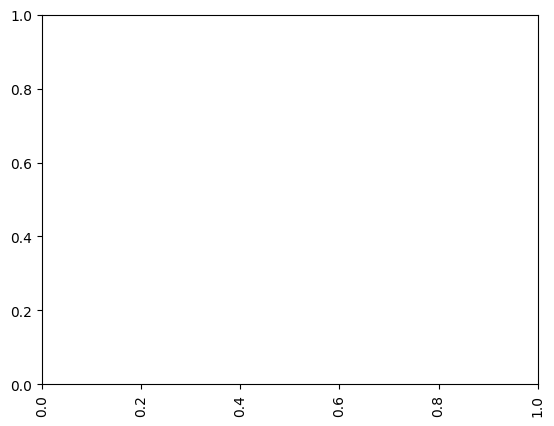

In [35]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Удаление строк

Некоторые признаки имеют только одну-две строки с отсутствующими значениями. На основе файла .txt с описанием признаков нашего набора данных, мы могли бы легко заполнить эти данные некоторыми значениями, и это было бы отличное решение. Однако здесь давайте покажем Вам, как удалять такие строки - это пригодится в тех случаях, когда у Вас нет хорошей интерпретации того, что означают отсутствующие значения.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [ ]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [36]:
percent_nan = percent_missing(df)

(0.0, 1.0)

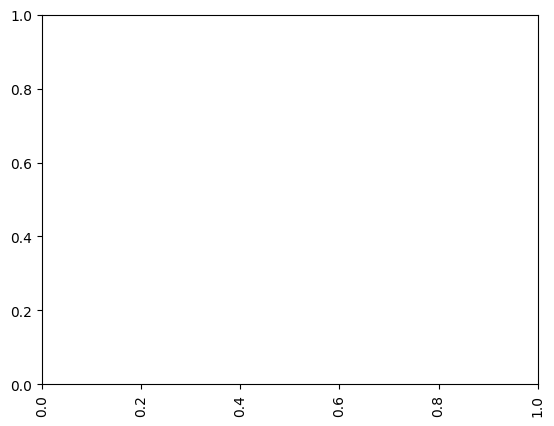

In [37]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Признак "Mas Vnr"

На основе текстового описания набора данных, отсутствие данных в признаках Mas Vnr Type и Mas Vnr Area скорее всего означает, что дом не имеет облицовки каменной плиткой, и в этом случае мы укажем нулевое значение, как мы делали раньше для других признаков.

In [ ]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [38]:
percent_nan = percent_missing(df)

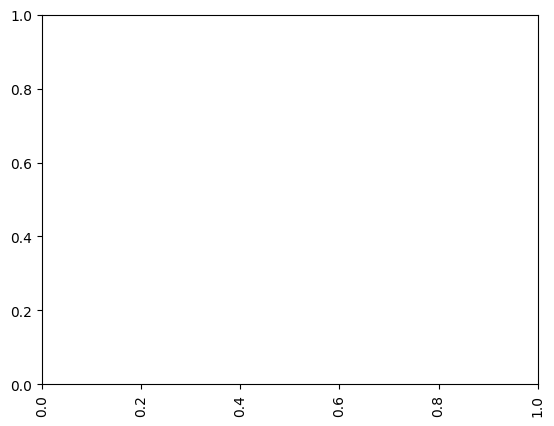

In [39]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
# Работа со строками завершена

# Работа с отсутствующими данными в колонках

Ранее мы смотрели на отсутствие данных в строках; теперь посмотрим на колонки признаков, поскольку здесь есть достаточно большой процент отсутствующих значений.

### Колонки Garage

Судя по описанию данных, значение NaN означает отсутствие гаража, так что мы запишем значение "None" или 0.

In [40]:
df[['Опыт работы', 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы']]

,Опыт работы,Последняя/нынешняя должность,Последнее/нынешнее место работы
0,Опыт работы 16 лет 10 месяцев Август 2010 — п...,Системный администратор,"МАОУ ""СОШ № 1 г.Немана"""
1,Опыт работы 19 лет 5 месяцев Январь 2000 — по...,"Менеджер проекта, Аналитик, Технический писатель",Временный трудовой коллектив
2,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,Кассир-операционист,ПАО Сбербанк
3,Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,Инженер-программист,OpenSoft
4,Опыт работы 5 лет 7 месяцев Региональный мене...,Менеджер по продажам,Мармелад
...,...,...,...
44739,"Опыт работы 7 лет 7 месяцев Финансист, аналит...",Руководитель субгруппы,"ООО ""IAS"" (независимый участник объединения Ru..."
44740,"Опыт работы 7 лет Системный администратор, IT...",Предприниматель,ИП Пестрецов
44741,Опыт работы 21 год 5 месяцев Январь 1998 — по...,Начальник группы аналитики,"ОАО «ЧМК», Исследовательско-Технологический Це..."
44742,Опыт работы 3 года 10 месяцев Контент-менедже...,Менеджер проектов,IQ-Maxima


In [41]:
gar_str_cols = ['Опыт работы', 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [42]:
percent_nan = percent_missing(df)

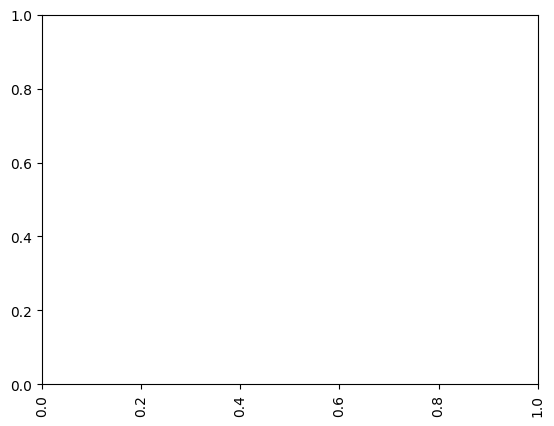

In [43]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [44]:
df['Опыт работы'] = df['Опыт работы'].fillna(0)

In [45]:
percent_nan = percent_missing(df)

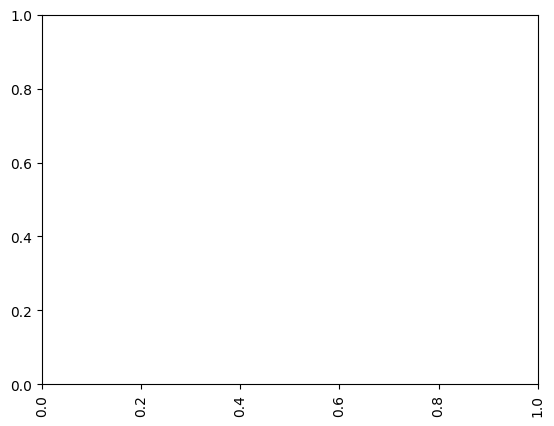

In [46]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Удаление колонок с признаками

Если значения отсутствуют в достаточно большом количестве строк, то имеет смысл удалить такие колонки полностью. Например, если 99% строк имеют неопределённое значение в каком-то признаке, то этот признак не сможет использоваться для предсказывания целевой переменной, поскольку почти все данные в этом признаке неопределены. В нашем наборе данных, многие из признаков с большим количеством значений NaN по сути должны содержать значения "none" или 0. Но чтобы показать Вам различные варианты работы с отсутствующими значениями, мы удалим эти признаки вместо того, чтобы заполнить отсутствующие значения нулями или "none".

In [47]:
percent_nan.index

Index([], dtype='object')

In [48]:
df[['Опыт работы', 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы']]

,Опыт работы,Последняя/нынешняя должность,Последнее/нынешнее место работы
0,Опыт работы 16 лет 10 месяцев Август 2010 — п...,Системный администратор,"МАОУ ""СОШ № 1 г.Немана"""
1,Опыт работы 19 лет 5 месяцев Январь 2000 — по...,"Менеджер проекта, Аналитик, Технический писатель",Временный трудовой коллектив
2,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,Кассир-операционист,ПАО Сбербанк
3,Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,Инженер-программист,OpenSoft
4,Опыт работы 5 лет 7 месяцев Региональный мене...,Менеджер по продажам,Мармелад
...,...,...,...
44739,"Опыт работы 7 лет 7 месяцев Финансист, аналит...",Руководитель субгруппы,"ООО ""IAS"" (независимый участник объединения Ru..."
44740,"Опыт работы 7 лет Системный администратор, IT...",Предприниматель,ИП Пестрецов
44741,Опыт работы 21 год 5 месяцев Январь 1998 — по...,Начальник группы аналитики,"ОАО «ЧМК», Исследовательско-Технологический Це..."
44742,Опыт работы 3 года 10 месяцев Контент-менедже...,Менеджер проектов,IQ-Maxima


In [ ]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [50]:
percent_nan = percent_missing(df)

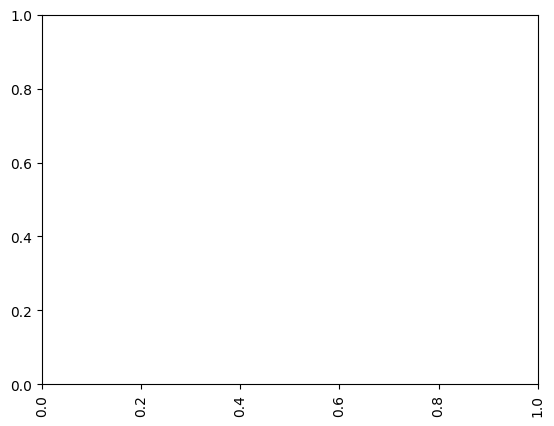

In [51]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Заполняем колонку Fireplace Quality на основе текстового описания

In [52]:
df['Опыт работы'].value_counts()

Опыт работы
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [ ]:
percent_nan = percent_missing(df)

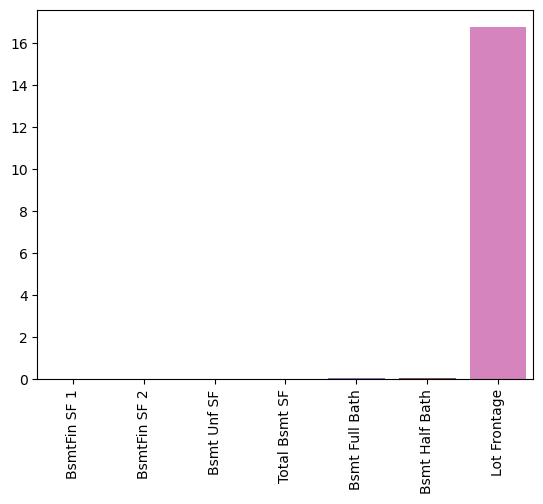

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Замена отсутствующих данных каким-то другим значением

Чтобы заменить отсутствующие данные в заданном признаке, нам нужно решить, какой из других признаков (без значений NaN) лучше всего коррелирует с нашим признаком. В нашем примере мы будем работать со следующими признаками:

Neighborhood: районы внутри городской черты Ames

LotFrontage: ширина фронтальной стороны дома (со стороны улицы), в футах

Мы будем работать в предположении, что признак Lot Frontage коррелирует с признаком neighborhood.

In [ ]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

TypeError: 'value' must be an instance of str or bytes, not a int

Error in callback <function _draw_all_if_interactive at 0x7fa99edc89a0> (for post_execute):


KeyboardInterrupt: 

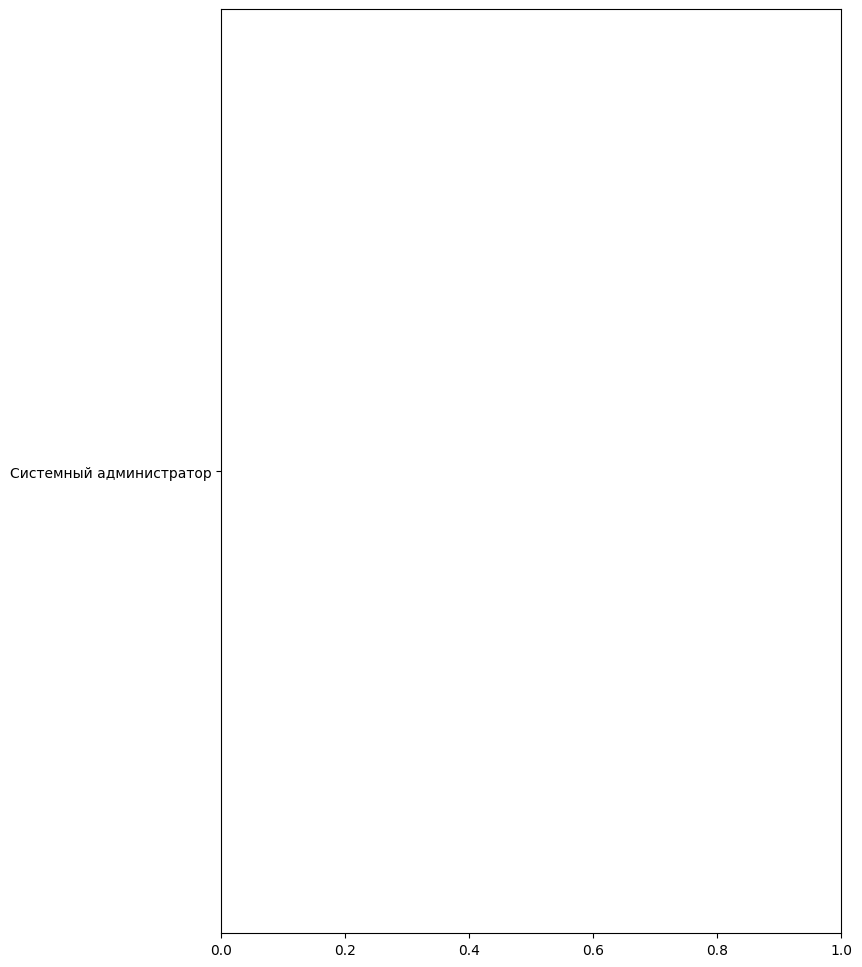

In [54]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Опыт работы',y='Последняя/нынешняя должность',data=df,orient='h')

## Замена отсутствующих данных на основе других признаков

Есть и более сложные методы, но обычно чем проще метод, тем лучше. Тогда мы можем не создавать модели поверх других моделей.

Про дополнительные методы замены отсутствующих значений можно почитать в этой статье: https://scikit-learn.org/stable/modules/impute.html

In [55]:
df.groupby('Опыт работы')['Последнее/нынешнее место работы']

In [56]:
df.groupby('Опыт работы')['Последнее/нынешнее место работы'].mean()

TypeError: agg function failed [how->mean,dtype->object]

## Трансформация колонки

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [ ]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [ ]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [ ]:
df.iloc[21:26]['Lot Frontage']
# метод .iloc[] для извлечения строк с индексами от 21 до 25 из DataFrame df,
# а затем извлекает столбец 'Lot Frontage' в этих строках.

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
# команда будет заполнять пропущенные значения столбца 'Lot Frontage'
# средним значением 'Lot Frontage' для недвижимости в каждом районе.

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26] # проверка

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
percent_nan = percent_missing(df)

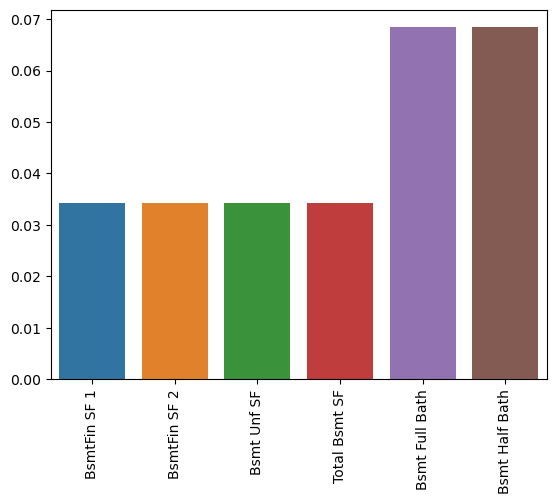

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df['Lot Frontage'].isnull().sum()

0

In [ ]:
# Остались несколько домов с пропущенными данными 'Lot Frontage'

In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
df['Lot Frontage'].isnull().sum()

0

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

BsmtFin SF 1      0.034188
BsmtFin SF 2      0.034188
Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
dtype: float64

Отлично! Теперь во всём нашем наборе данных нет отсутствующих значений! Имейте ввиду, что все такие трансформации лучше реализовывать в виде функций, которые потом можно легко использовать. А теперь давайте сохраним наш набор данных:

In [ ]:
df.to_csv("../DATA/Ames_NO_Missing_Data22.csv",index=False)

----